<a href="https://colab.research.google.com/github/ghafourvala/Beijing-Multi-Site-Air-Quality-Data/blob/main/Beijing_Multi_Site_Air_Quality_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beijing Multi-Site Air-Quality Data

## Importing the modules

First we introduce all the modules used in this project.

In [15]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import missingno as msno

import datetime as dt

from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.metrics import mean_squared_error,mean_absolute_error

import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.ar_model import AR, ARResults

from statsmodels.tsa.stattools import grangercausalitytests

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset

[Insert some note on what is the dataset and its source.]

In [16]:
df=pd.read_csv("/content/drive/MyDrive/Python/Beijing Multi-Site Air-Quality Data/PRSA_Data_Changping_20130301-20170228.csv")

# Exploratory Data Analysis (EDA)

[What information do we get from the following summary of the dataset?]

In [17]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [18]:
df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping
35063,35064,2017,2,28,23,20.0,25.0,6.0,28.0,900.0,54.0,7.0,1009.4,-12.2,0.0,N,1.9,Changping


In [19]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


### Check for missing data points

[Understanding the scale of the missing values in the dataset.]

Percentage of the missing values:

In [21]:
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,774
PM10,582
SO2,628
NO2,667
CO,1521


In [22]:
df.isnull().sum() / len(df) * 100

,0
No,0.000000
year,0.000000
month,0.000000
day,0.000000
hour,0.000000
PM2.5,2.207392
PM10,1.659822
SO2,1.791011
NO2,1.902236
CO,4.337782


[Understanding the patterns of the missing data]

<Axes: >

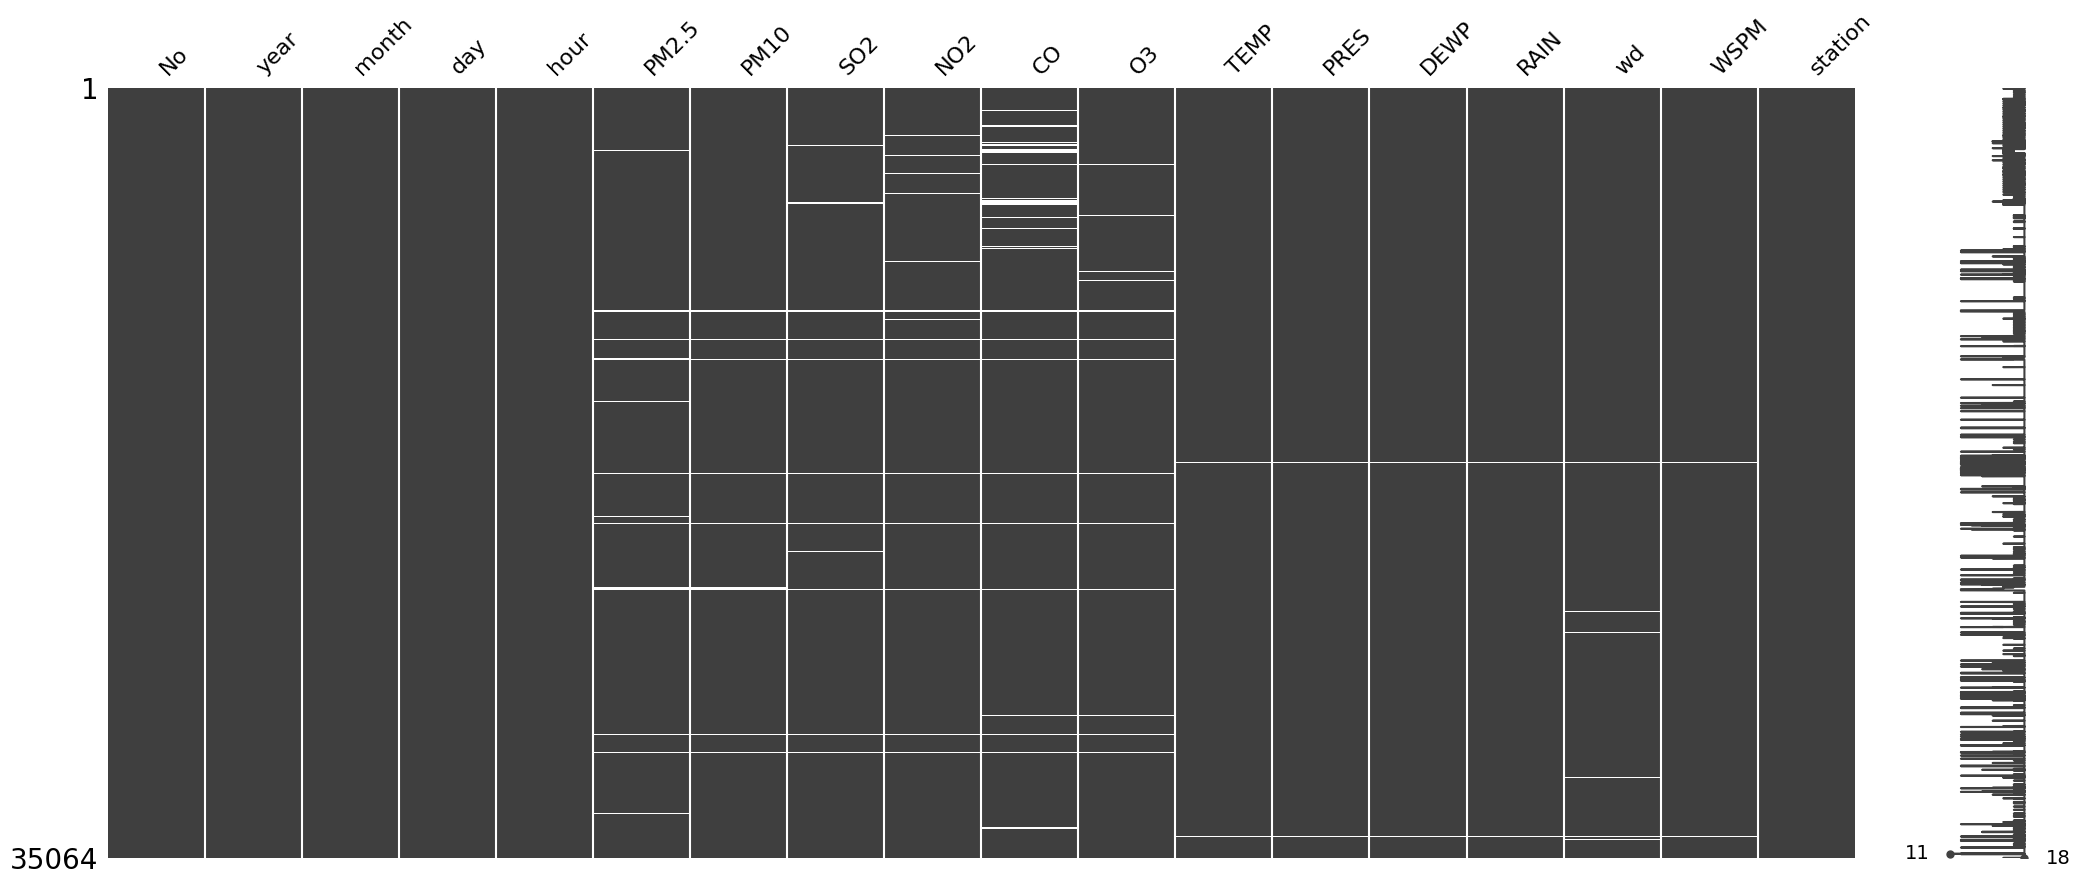

In [23]:
msno.matrix(df)

<Axes: >

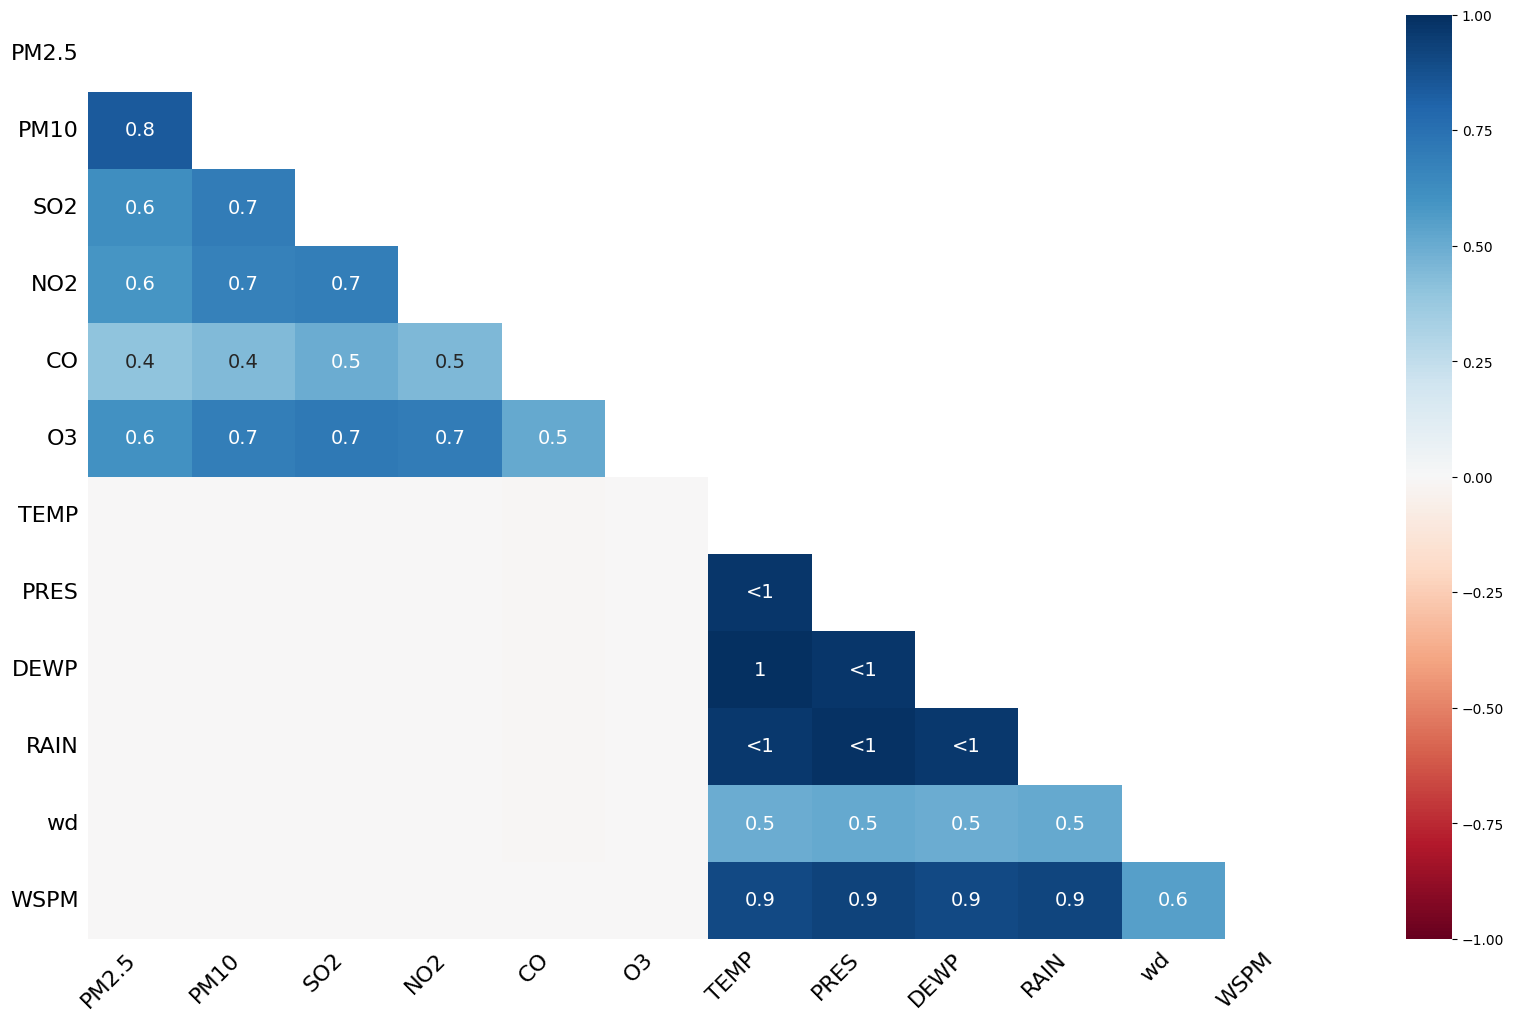

In [24]:
msno.heatmap(df)

Missingness in weather data and pollution data happens independently from each other which dictates seperate imputations for each.
Weather data has very few scattered missing data points, wheras pollution features occur more often with larger gap in the data.

### Prepare data

In [25]:
## Creating a timestamp index from columns containing the time elements
df['Time']=pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.index = df['Time']

In [26]:
## Transform WD (Wind Direction) into a numerical and then cyclical feature
wd_dict = {'N':0, 'NNE':22.5,"NE":45,"ENE":67.5, 'E':90,'ESE':112.5, 'SE':135,'SSE':157.5, 'S':180,'SSW':202.5, 'SW':225,'WSW':247.5, 'W':270,'WNW':292.5,'NW':315,'NNW':337.5, 'N':0,'North':0,'East':90,'West':270,'South':180}
df['wd_numeric'] = df['wd'].map(wd_dict)
df['wd_sin'] = np.sin(df['wd_numeric']*(2*np.pi/360))
df['wd_cos'] = np.cos(df['wd_numeric']*(2*np.pi/360))

In [51]:
## Create additional Time features: Day of Week,Day of Year, Week of Year, Month of Year
df['dayofweek'] = df.index.dayofweek
df['dayofyear'] = df.index.dayofyear - 1
df['weekofyear'] = df.index.isocalendar().week - 1
df['monthofyear'] = df.index.month - 1
#df.drop(['No', 'year', 'month', 'day', 'hour', 'Time'], axis=1, inplace=True)

In [52]:
## Transform the newly created time features into cyclical
df['dayofweek_sin'] = np.sin(df['dayofweek']*(2*np.pi/7))
df['dayofweek_cos'] = np.cos(df['dayofweek']*(2*np.pi/7))
df['dayofyear_sin'] = np.sin(df['dayofyear']*(2*np.pi/365.25))
df['dayofyear_cos'] = np.cos(df['dayofyear']*(2*np.pi/365.25))
df['weekofyear_sin'] = np.sin(df['weekofyear']*(2*np.pi/52))
df['weekofyear_cos'] = np.cos(df['weekofyear']*(2*np.pi/52))
df['monthofyear_sin'] = np.sin(df['monthofyear']*(2*np.pi/12))
df['monthofyear_cos'] = np.cos(df['monthofyear']*(2*np.pi/12))

In [ ]:
## Adding a new column to identify the day of the week and dropping extra columns
df['weekday']=df['Time'].dt.day_name()
df.drop(['No', 'year', 'month', 'day', 'hour', 'Time'], axis=1, inplace=True)

In [53]:
df.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,...,dayofweek_sin,dayofweek_cos,dayofmonth_sin,dayofmonth_cos,dayofyear_sin,dayofyear_cos,weekofyear_sin,weekofyear_cos,monthofyear_sin,monthofyear_cos
count,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,...,35064.000000,35064.000000,35064.000000,35064.000000,3.506400e+04,35064.000000,35064.0,35064.0,35064.000000,3.506400e+04
mean,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,...,-0.000964,0.000769,0.005008,-0.017610,3.404380e-17,0.000684,-0.001127,0.004014,-0.003129,-4.149335e-03
std,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,...,0.707049,0.707184,0.712446,0.701509,7.068748e-01,0.707358,0.705248,0.708969,0.706989,7.072257e-01
min,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,...,-0.974928,-0.900969,-0.998717,-0.994869,-9.999907e-01,-0.999963,-1.0,-1.0,-1.000000,-1.000000e+00
25%,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,...,-0.781831,-0.900969,-0.724793,-0.758758,-7.055836e-01,-0.708627,-0.663123,-0.663123,-0.500000,-8.660254e-01
50%,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,...,0.000000,-0.222521,0.000000,-0.050649,0.000000e+00,0.004304,0.0,0.0,0.000000,-1.836970e-16
75%,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,...,0.781831,0.623490,0.724793,0.688967,7.055836e-01,0.702527,0.663123,0.748511,0.866025,5.000000e-01
max,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,...,0.974928,1.000000,0.998717,1.000000,9.999907e-01,1.000000,1.0,1.0,1.000000,1.000000e+00


### [Deal with the missing data!]

What to use:
- KNN for the missing weather data.
  - Add Hour of Day, Day of Week, Day of Month, Day of Year, Week of Year, Month of Year
  - Transform the time features into cyclical form
  - convert WD (which is categorical) into numerical and then cyclical feature
  - Scale the data using Standard Scaler or MinMaxScaler
  - Apply KNN
    - Experiment with n_neighbors and set the weights factors.
  - Unscale date (Inverse Transform)
- MICE for pollution data

### Resampling the data

Considering the resolution of the data and the purpose of this project, it is helpful to aggregate the data to a higher level. In this step the data is sampled down to daily data points. Maximum, average, and min values of the measurements are included according to their meaning.
https://www.airnow.gov/sites/default/files/2020-05/aqi-technical-assistance-document-sept2018.pdf

In [ ]:
dfrs = df.resample(rule='W').agg({'PM2.5': "max", "PM10": "max", "SO2": "max", "NO2": "max", "CO": "max", "O3": "max", "TEMP": ["max", "mean", "min"], "PRES": "mean", "DEWP":"mean", "RAIN": "sum", "WSPM": "mean"})
dfrs.columns = ["_".join(a) for a in dfrs.columns.to_flat_index()]
dfrs.head()

,PM2.5_max,PM10_max,SO2_max,NO2_max,CO_max,O3_max,TEMP_max,TEMP_mean,TEMP_min,PRES_mean,DEWP_mean,RAIN_sum,WSPM_mean
Time,,,,,,,,,,,,,
2013-03-03,117.0,181.0,135.0,135.0,2799.0,77.0000,16.9,2.525000,-5.8,1022.777778,-15.666667,0.0,2.130556
2013-03-10,376.0,844.0,182.0,226.0,5700.0,84.0000,22.5,7.797619,-2.1,1008.958929,-7.088690,0.0,2.006548
2013-03-17,434.0,462.0,161.0,174.0,3500.0,107.0000,15.9,6.402976,-2.3,1014.233929,-2.277976,2.9,1.599405
2013-03-24,463.0,494.0,83.0,156.0,4099.0,107.0000,12.0,4.535119,-5.7,1009.782738,-5.529762,16.6,2.416667
2013-03-31,235.0,326.0,150.0,139.0,3299.0,93.6054,19.5,6.991071,-1.1,1012.829762,-3.762500,0.0,1.922024


<AxesSubplot:xlabel='Time'>

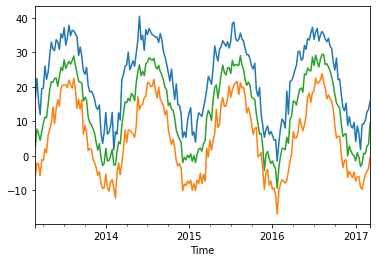

In [ ]:
dfrs['TEMP_max'].plot()
dfrs['TEMP_min'].plot()
dfrs['TEMP_mean'].plot()


### Choosing data elements to focus on

In [ ]:
dfrsTEMP = dfrs[['TEMP_max', 'TEMP_mean', 'TEMP_min']]
dfrsTEMP.head()

,TEMP_max,TEMP_mean,TEMP_min
Time,,,
2013-03-03,16.9,2.525000,-5.8
2013-03-10,22.5,7.797619,-2.1
2013-03-17,15.9,6.402976,-2.3
2013-03-24,12.0,4.535119,-5.7
2013-03-31,19.5,6.991071,-1.1


### ETS Decomposition

In [ ]:
ETSTEMP = seasonal_decompose(dfrsTEMP['TEMP_mean'], model='additive')

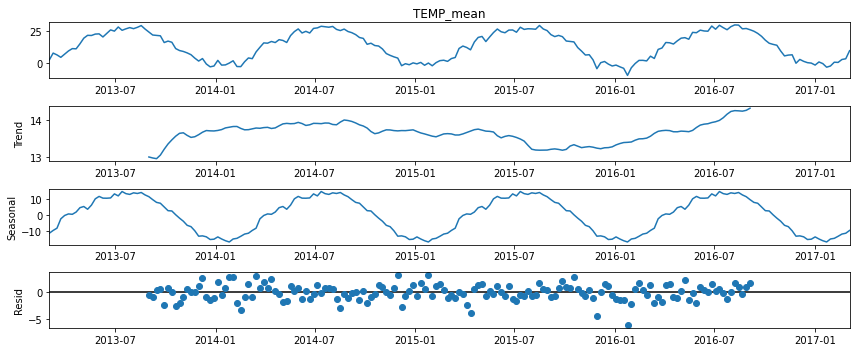

In [ ]:
rcParams['figure.figsize'] = 12, 5
ETSTEMP.plot();

The results of the decomposition above indicates that we need to use an additive model for forcasting the temperature avriable.

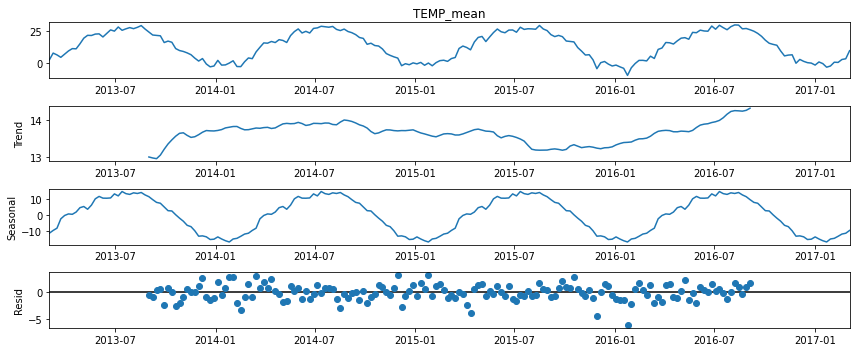

In [ ]:
ETSTEMPw = seasonal_decompose(dfrsTEMP['TEMP_mean'].resample(rule='W').mean(), model='additive')
rcParams['figure.figsize'] = 12, 5
ETSTEMPw.plot();

### Stationarity

Visual inspection of the data shows its non-stationary characteristic. We can also test its stationarity using the Augmented Dickey-Fuller test.

In [ ]:
## Stationarity test using ad-fuller method
STTTEMP = adfuller(dfrsTEMP['TEMP_mean'])
print('ADF Statistic: %f' % STTTEMP[0])
print('p-value: %f' % STTTEMP[1])
print('Critical Values:')
for key, value in STTTEMP[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.727835
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


According to the outcome o of the ADF test which is over 5% we reject the null hypothesis and conclude that the data is non-stationary.

### MA - Simple Moving Average

<AxesSubplot:xlabel='Time'>

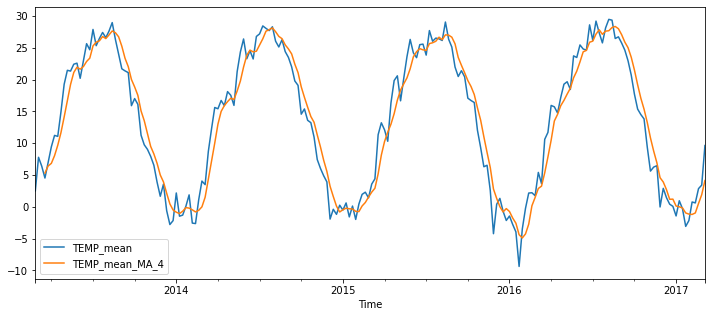

In [ ]:
dfrsTEMP['TEMP_mean_MA_4'] = dfrsTEMP['TEMP_mean'].rolling(window=4).mean()
dfrsTEMP[['TEMP_mean', 'TEMP_mean_MA_4']].plot()

### Exponentially Weighted Moving Average

<AxesSubplot:xlabel='Time'>

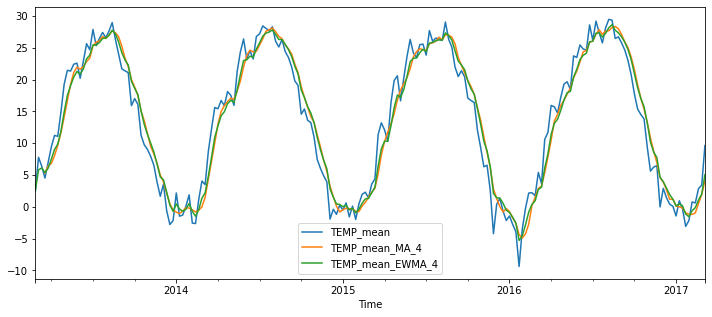

In [ ]:
dfrsTEMP['TEMP_mean_EWMA_4'] = dfrsTEMP['TEMP_mean'].ewm(span=4).mean()
dfrsTEMP[['TEMP_mean', 'TEMP_mean_MA_4', 'TEMP_mean_EWMA_4']].plot()

<AxesSubplot:xlabel='Time'>

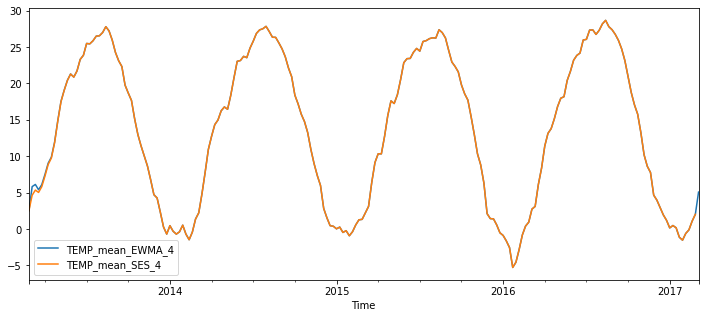

In [ ]:
## StatsModels provides a function that can give us the same outcome.
dfrsTEMP['TEMP_mean_SES_4']=SimpleExpSmoothing(dfrsTEMP['TEMP_mean']).fit(smoothing_level=(2/(4+1)),optimized=False).fittedvalues.shift(-1)
dfrsTEMP[['TEMP_mean_EWMA_4','TEMP_mean_SES_4']].plot()

Now we are going to add the second layer of smoothing which is the trend. As concluded above, this data

<AxesSubplot:xlabel='Time'>

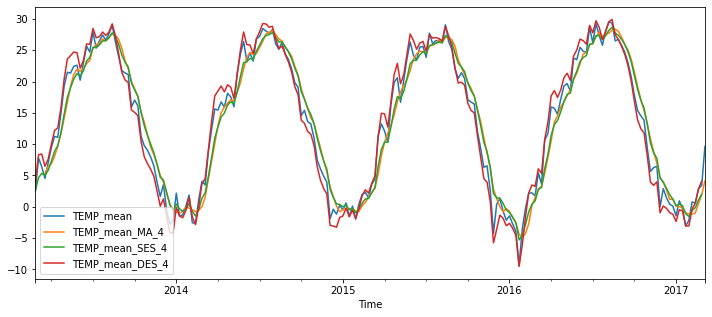

In [ ]:
dfrsTEMP['TEMP_mean_DES_4']=ExponentialSmoothing(dfrsTEMP['TEMP_mean'],trend='add').fit().fittedvalues.shift(-1)
dfrsTEMP[['TEMP_mean', 'TEMP_mean_MA_4', 'TEMP_mean_SES_4', 'TEMP_mean_DES_4']].plot()

Here we add the seasonality as the third level of smoothing.

<AxesSubplot:xlabel='Time'>

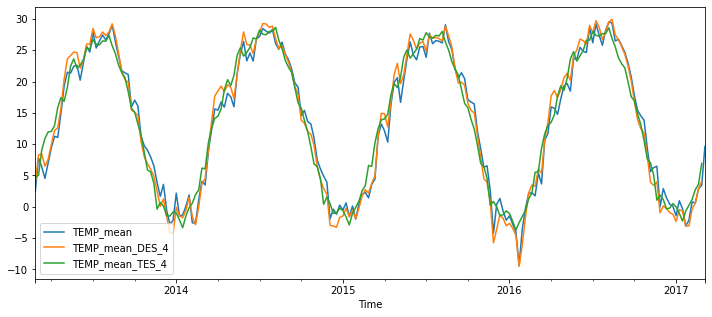

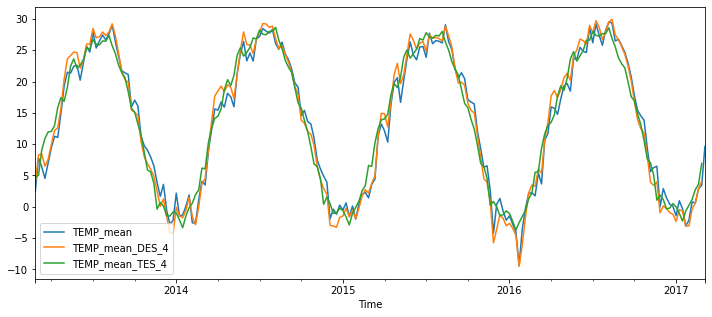

In [ ]:
dfrsTEMP['TEMP_mean_TES_4']=ExponentialSmoothing(dfrsTEMP['TEMP_mean'],trend='add', seasonal='add', seasonal_periods=52).fit().fittedvalues.shift(-1)
dfrsTEMP[['TEMP_mean','TEMP_mean_DES_4','TEMP_mean_TES_4']].plot()
dfrsTEMP[['TEMP_mean','TEMP_mean_DES_4','TEMP_mean_TES_4']].plot()

### Forecasting

In this step we build a simple forcasting model based on the Exponential Weighted Moving average above

##### Train the Model

In [ ]:
## Creating the train and test datasets
dfrsTEMPtrain = dfrsTEMP[:'2016-03-01']
dfrsTEMPtest = dfrsTEMP['2016-03-01':]
dfrsTEMPtest

,TEMP_max,TEMP_mean,TEMP_min,TEMP_mean_MA_4,TEMP_mean_EWMA_4,TEMP_mean_SES_4,TEMP_mean_DES_4,TEMP_mean_TES_4
Time,,,,,,,,
2016-03-06,18.800000,5.418452,-7.000,2.894048,2.731803,2.731803,6.061581,5.602698
2016-03-13,12.100000,3.653571,-4.400,3.263988,3.100511,3.100511,5.328788,9.351790
2016-03-20,21.600000,10.627976,-1.400,5.364881,6.111497,6.111497,10.797854,11.645260
2016-03-27,21.900000,11.717262,0.500,7.854315,8.353803,8.353803,13.495932,12.995549
2016-04-03,23.000000,15.954167,7.000,10.488244,11.393948,11.393948,17.700632,13.490174
2016-04-10,24.900000,15.736310,5.200,13.508929,13.130893,13.130893,18.552880,14.679695
2016-04-17,26.300000,14.766071,5.200,14.543452,13.784964,13.784964,17.453002,17.696083
2016-04-24,30.200000,17.210119,6.800,15.916667,15.155026,15.155026,18.691316,19.307495
2016-05-01,30.400000,19.295238,10.900,16.751935,16.811111,16.811111,20.615198,18.572544


In [ ]:
## Fitting a model on the training dataset
TES_TEMP_fitted = ExponentialSmoothing(dfrsTEMPtrain['TEMP_mean'],
                                      #trend='add',
                                      seasonal='add',
                                      seasonal_periods=52).fit()

In [ ]:
TES_TEMP_pred = TES_TEMP_fitted.forecast(52)

In [ ]:
TES_TEMP_pred.count()

52

<AxesSubplot:xlabel='Time'>

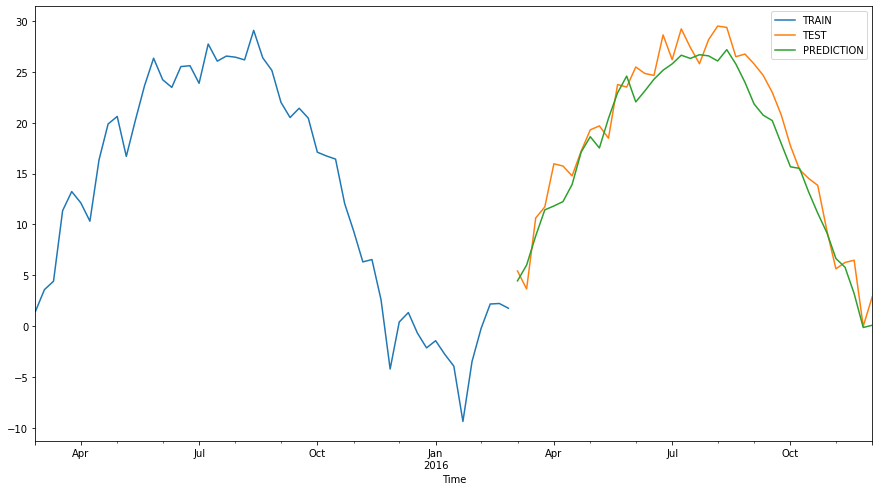

In [ ]:
## Plot the train, test, and fitted model datasets
dfrsTEMPtrain['TEMP_mean'].plot(legend=True,label='TRAIN',figsize=(15,8))
dfrsTEMPtest['TEMP_mean'].plot(legend=True,label='TEST')
TES_TEMP_pred.plot(legend=True,label='PREDICTION',xlim=['2015-03-01','2016-12-01'])

##### Evaluating Forecast Prediction

In [ ]:
dfrsTEMPtest['TEMP_mean'].describe()

count    53.000000
mean     14.183689
std      10.720755
min      -3.067464
25%       3.425000
50%      15.377976
75%      24.652976
max      29.491071
Name: TEMP_mean, dtype: float64

In [ ]:
print(f"Mean Absolute Error: {mean_absolute_error(dfrsTEMPtest['TEMP_mean'],TES_TEMP_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(dfrsTEMPtest['TEMP_mean'],TES_TEMP_pred))}")

ValueError: Found input variables with inconsistent numbers of samples: [53, 52]

##### Prediction

In [ ]:
## Train the model with the whole dataset
TEMP_forecast_model = ExponentialSmoothing(dfrsTEMP['TEMP_mean'],
                                      trend='add',
                                      seasonal='add',
                                      seasonal_periods=365).fit()

In [ ]:
TEMP_forecast_prediction = TEMP_forecast_model.forecast(365)

In [ ]:
## Plot the original data and prediction
dfrsTEMP['TEMP_mean'].plot(figsize=(12,8))
TEMP_forecast_prediction.plot()

### ACF and PACF

Auto Correlation Function (ACF) and Partial Auto Correlation Function (PACF) are basically evaluating how much the values in a time series is related to it's previous values. They are used to figure the parameters used in prediction models.

In [ ]:
lag_plot(dfrsTEMP['TEMP_mean'])

In [ ]:
plot_acf(dfrsTEMP['TEMP_mean'], lags=365);

In [ ]:
plot_pacf(dfrsTEMP['TEMP_mean'], lags=365);

### AR models

In [ ]:
TEMP_AR_model = AR(dfrsTEMPtrain['TEMP_mean'])

In [ ]:
TEMP_AR_model = AR(dfrsTEMPtrain['TEMP_mean'])
TEMP_AR_model_fit_1 =TEMP_AR_model.fit(maxlag=1)
TEMP_AR_model_fit_1_PRED = TEMP_AR_model_fit_1.predict(start=len(dfrsTEMPtrain),end=len(dfrsTEMPtrain)+len(dfrsTEMPtest)+1)
TEMP_AR_model_fit_1_PRED = TEMP_AR_model_fit_1_PRED.rename('AR(1) Predictions')
dfrsTEMPtrain['TEMP_mean'].plot(legend=True,label='TRAIN',figsize=(15,8))
dfrsTEMPtest['TEMP_mean'].plot(legend=True,label='TEST')
TEMP_AR_model_fit_1_PRED.plot(legend=True,xlim=['2015-03-01','2016-12-01'])

In [ ]:
TEMP_AR_model = AR(dfrsTEMPtrain['TEMP_mean'])
TEMP_AR_model_fit_2 =TEMP_AR_model.fit(maxlag=2)
TEMP_AR_model_fit_2_PRED = TEMP_AR_model_fit_2.predict(start=len(dfrsTEMPtrain),end=len(dfrsTEMPtrain)+len(dfrsTEMPtest)+1)
TEMP_AR_model_fit_2_PRED = TEMP_AR_model_fit_2_PRED.rename('AR(2) Predictions')
dfrsTEMPtrain['TEMP_mean'].plot(legend=True,label='TRAIN',figsize=(15,8))
dfrsTEMPtest['TEMP_mean'].plot(legend=True,label='TEST')
TEMP_AR_model_fit_2_PRED.plot(legend=True,xlim=['2015-03-01','2016-12-01'])

In [ ]:
TEMP_AR_model = AR(dfrsTEMPtrain['TEMP_mean'])
TEMP_AR_model_fit_ic =TEMP_AR_model.fit(ic='t-stat')
TEMP_AR_model_fit_ic_PRED = TEMP_AR_model_fit_ic.predict(start=len(dfrsTEMPtrain),end=len(dfrsTEMPtrain)+len(dfrsTEMPtest)+1)
TEMP_AR_model_fit_ic_PRED = TEMP_AR_model_fit_ic_PRED.rename('AR(ic) Predictions')
dfrsTEMPtrain['TEMP_mean'].plot(legend=True,label='TRAIN',figsize=(15,8))
dfrsTEMPtest['TEMP_mean'].plot(legend=True,label='TEST')
TEMP_AR_model_fit_ic_PRED.plot(legend=True,xlim=['2016-01-01','2016-05-01'])

In [ ]:
TEMP_AR_model_fit_ic.params

In [ ]:
TEMP_AR_model = AR(dfrsTEMPtrain['TEMP_mean'])
TEMP_AR_model_fit =TEMP_AR_model.fit()
TEMP_AR_model_fit_PRED = TEMP_AR_model_fit_ic.predict(start=len(dfrsTEMPtrain),end=len(dfrsTEMPtrain)+len(dfrsTEMPtest)+1)
TEMP_AR_model_fit_PRED = TEMP_AR_model_fit_ic_PRED.rename('AR() Predictions')
dfrsTEMPtrain['TEMP_mean'].plot(legend=True,label='TRAIN',figsize=(15,8))
dfrsTEMPtest['TEMP_mean'].plot(legend=True,label='TEST')
TEMP_AR_model_fit_ic_PRED.plot(legend=True,xlim=['2016-01-01','2016-05-01'])

In [ ]:
TEMP_AR_model_fit.params

### Granger Causality Test

Granger Causality Test is used to see if any other time series is affecting our data changes.
For this purpose we first plot other variables of our dataset and choose one to perform the test with.

In [ ]:
dfrs.plot(y=['TEMP_mean', 'PRES_mean', 'DEWP_mean', 'RAIN_sum', 'WSPM_mean'], figsize=(12,8));
dfrs.plot(y=['TEMP_mean', 'DEWP_mean', 'WSPM_mean'], figsize=(12,8));

In [ ]:
grangercausalitytests(dfrs[['TEMP_mean', 'DEWP_mean']], maxlag=15);

In [ ]:
grangercausalitytests(dfrs[['TEMP_mean', 'WSPM_mean']], maxlag=15);

In [ ]:
grangercausalitytests(dfrs[['TEMP_mean', 'PRES_mean']], maxlag=15);

In [ ]:
grangercausalitytests(dfrs[['TEMP_mean', 'RAIN_sum']], maxlag=15);

## ARIMA

In [ ]:
dfrs.head()

In [ ]:
stepwise_fit = auto_arima(dfrs['TEMP_mean'], start_p=0, start_q=0, trace=True, m=365)

In [ ]:
stepwise_fit.summary()